# Fake News Detection - Data Preprocessing

This notebook performs data cleaning, feature engineering, and prepares the dataset for machine learning models.

## Objectives
- Handle missing values
- Clean and preprocess text data (titles)
- Extract text features (length, word count, etc.)
- Encode categorical features (source domain)
- Normalize numerical features (tweet numbers)
- Split data into train and test sets
- Save processed datasets


In [8]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add src directory to path
# Get the project root directory (parent of notebooks directory)
current_dir = os.getcwd()
# If we're in notebooks directory, go up one level
if current_dir.endswith('notebooks'):
    project_root = os.path.dirname(current_dir)
else:
    # If we're in project root, use current directory
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Debug: print paths to verify
print(f"Current directory: {current_dir}")
print(f"Project root: {project_root}")
print(f"Source path: {src_path}")
print(f"Source exists: {os.path.exists(src_path)}")

# Import custom utilities
from data_utils import load_data
from preprocessing import (
    clean_text, extract_text_features, encode_source_domain,
    normalize_tweet_num, handle_missing_values, prepare_data,
    split_data, save_processed_data
)

# Reload modules if they were modified (useful during development)
import importlib
import preprocessing
import data_utils
importlib.reload(preprocessing)
importlib.reload(data_utils)
# Re-import after reload
from preprocessing import (
    clean_text, extract_text_features, encode_source_domain,
    normalize_tweet_num, handle_missing_values, prepare_data,
    split_data, save_processed_data
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Current directory: /Users/manalaamir/Documents/Fake News Detection -NLP
Project root: /Users/manalaamir/Documents/Fake News Detection -NLP
Source path: /Users/manalaamir/Documents/Fake News Detection -NLP/src
Source exists: True
Libraries imported successfully!


## 1. Load Raw Data


In [9]:
# Load the raw dataset
# Use the project_root we determined earlier
data_path = os.path.join(project_root, 'data', 'raw', 'FakeNewsNet.csv')
print(f"Loading data from: {data_path}")
print(f"File exists: {os.path.exists(data_path)}")

df_raw = load_data(data_path)

print(f"\nRaw dataset loaded: {df_raw.shape}")
print(f"\nColumns: {list(df_raw.columns)}")
print(f"\nFirst few rows:")
df_raw.head()


Loading data from: /Users/manalaamir/Documents/Fake News Detection -NLP/data/raw/FakeNewsNet.csv
File exists: True

Raw dataset loaded: (23196, 5)

Columns: ['title', 'news_url', 'source_domain', 'tweet_num', 'real']

First few rows:


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


## 2. Check Initial Data Quality


In [10]:
# Check for missing values
print("Missing Values:")
print(df_raw.isnull().sum())
print(f"\nTotal missing values: {df_raw.isnull().sum().sum()}")

# Check data types
print("\nData Types:")
print(df_raw.dtypes)

# Check for duplicates
print(f"\nDuplicate rows: {df_raw.duplicated().sum()}")


Missing Values:
title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

Total missing values: 660

Data Types:
title            object
news_url         object
source_domain    object
tweet_num         int64
real              int64
dtype: object

Duplicate rows: 137


## 3. Handle Missing Values


In [11]:
# Handle missing values
# Strategy: Fill text columns with empty string, numeric columns with 0
df_cleaned = handle_missing_values(df_raw, strategy='fill')

print("Missing values after handling:")
print(df_cleaned.isnull().sum())
print(f"\nTotal missing values: {df_cleaned.isnull().sum().sum()}")


Missing values after handling:
title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

Total missing values: 0


## 4. Text Cleaning


In [12]:
# Clean text in title column
print("Cleaning text data...")
df_cleaned['title_cleaned'] = df_cleaned['title'].apply(clean_text)

# Show examples of cleaned text
print("\nExamples of text cleaning:")
sample_df = df_cleaned[['title', 'title_cleaned']].head(10)
for idx, row in sample_df.iterrows():
    print(f"\nOriginal: {row['title']}")
    print(f"Cleaned:  {row['title_cleaned']}")
    print("-" * 80)


Cleaning text data...

Examples of text cleaning:

Original: Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)
Cleaned:  kandi burruss explodes over rape accusation on real housewives of atlanta reunion video
--------------------------------------------------------------------------------

Original: People's Choice Awards 2018: The best red carpet looks
Cleaned:  peoples choice awards 2018 the best red carpet looks
--------------------------------------------------------------------------------

Original: Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'
Cleaned:  sophia bush sends sweet birthday message to one tree hill costar hilarie burton breyton 4eva
--------------------------------------------------------------------------------

Original: Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT
Cleaned:  colombian singer maluma sparks rumours of inappropriate relation

## 5. Feature Engineering


In [13]:
# Extract text features from cleaned titles
print("Extracting text features...")
df_cleaned = extract_text_features(df_cleaned, text_col='title_cleaned')

# Display new features
print("\nNew text features created:")
text_features = ['char_length', 'word_count', 'avg_word_length', 
                 'uppercase_count', 'digit_count', 'exclamation_count', 'question_count']
print(df_cleaned[text_features].head(10))
print(f"\nText features statistics:")
print(df_cleaned[text_features].describe())


Extracting text features...

New text features created:
   char_length  word_count  avg_word_length  uppercase_count  digit_count  \
0           87          13         6.214286                0            0   
1           52           9         5.200000                0            4   
2           92          15         5.750000                0            1   
3           78          10         7.090909                0            0   
4           98          17         5.444444                0            2   
5           74          12         5.692308                0            0   
6           53           8         5.888889                0            0   
7           75          12         5.769231                0            0   
8           91          14         6.066667                0            0   
9           67          10         6.090909                0            0   

   exclamation_count  question_count  
0                  0               0  
1                 

## 6. Encode Categorical Features


In [14]:
# Encode source domain using label encoding
print("Encoding source domain...")
df_cleaned = encode_source_domain(df_cleaned, method='label')

print(f"\nSource domain encoding complete!")
print(f"Number of unique domains: {df_cleaned['source_domain'].nunique()}")
print(f"\nSample of encoded domains:")
print(df_cleaned[['source_domain', 'source_domain_encoded']].head(10))


Encoding source domain...

Source domain encoding complete!
Number of unique domains: 2442

Sample of encoded domains:
           source_domain  source_domain_encoded
0             toofab.com                    973
1          www.today.com                   2260
2       www.etonline.com                   1436
3    www.dailymail.co.uk                   1355
4        www.zerchoo.com                   2420
5  www.intouchweekly.com                   1635
6       yournewswire.com                   2431
7       www.etonline.com                   1436
8            www.aol.com                   1173
9       www.98online.com                   1133


## 7. Normalize Numerical Features


Normalizing tweet numbers...

Tweet number statistics:
Original - Mean: 88.96, Std: 488.69
Normalized - Mean: 3.26, Std: 1.55


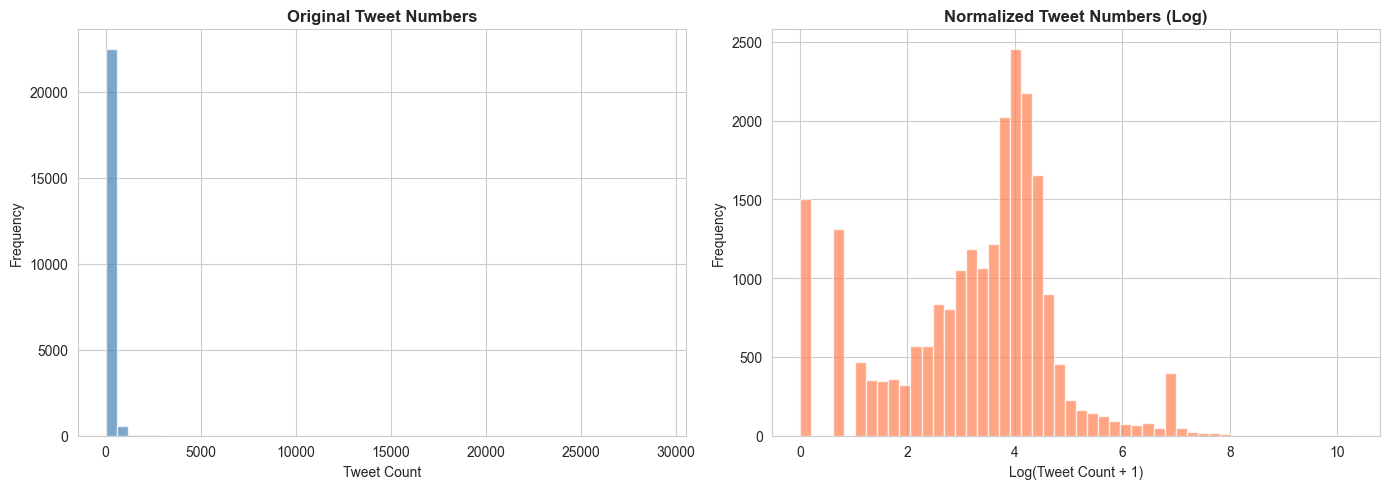

In [15]:
# Normalize tweet numbers using log transformation
print("Normalizing tweet numbers...")
df_cleaned = normalize_tweet_num(df_cleaned, method='log')

print("\nTweet number statistics:")
print(f"Original - Mean: {df_cleaned['tweet_num'].mean():.2f}, Std: {df_cleaned['tweet_num'].std():.2f}")
print(f"Normalized - Mean: {df_cleaned['tweet_num_normalized'].mean():.2f}, Std: {df_cleaned['tweet_num_normalized'].std():.2f}")

# Visualize the transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_cleaned['tweet_num'], bins=50, alpha=0.7, color='steelblue')
axes[0].set_title('Original Tweet Numbers', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tweet Count')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_cleaned['tweet_num_normalized'], bins=50, alpha=0.7, color='coral')
axes[1].set_title('Normalized Tweet Numbers (Log)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Log(Tweet Count + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## 8. Complete Preprocessing Pipeline


In [16]:
# Use the complete preprocessing pipeline (alternative approach)
# This applies all preprocessing steps in one function
print("Running complete preprocessing pipeline...")
df_processed = prepare_data(
    df_raw,
    text_col='title',
    label_col='real',
    clean_text_flag=True,
    extract_features_flag=True,
    encode_source_flag=True,
    normalize_tweet_flag=True,
    handle_missing_flag=True,
    missing_strategy='fill'
)

print(f"\nPreprocessing complete!")
print(f"Original shape: {df_raw.shape}")
print(f"Processed shape: {df_processed.shape}")
print(f"\nNew columns added:")
new_cols = [col for col in df_processed.columns if col not in df_raw.columns]
print(new_cols)


Running complete preprocessing pipeline...

Preprocessing complete!
Original shape: (23196, 5)
Processed shape: (23196, 15)

New columns added:
['title_cleaned', 'char_length', 'word_count', 'avg_word_length', 'uppercase_count', 'digit_count', 'exclamation_count', 'question_count', 'source_domain_encoded', 'tweet_num_normalized']


## 9. Final Processed Dataset Overview


In [17]:
# Display processed dataset info
print("Processed Dataset Information:")
print(f"Shape: {df_processed.shape}")
print(f"\nColumns: {list(df_processed.columns)}")
print(f"\nData types:")
print(df_processed.dtypes)
print(f"\nFirst few rows:")
df_processed.head()


Processed Dataset Information:
Shape: (23196, 15)

Columns: ['title', 'news_url', 'source_domain', 'tweet_num', 'real', 'title_cleaned', 'char_length', 'word_count', 'avg_word_length', 'uppercase_count', 'digit_count', 'exclamation_count', 'question_count', 'source_domain_encoded', 'tweet_num_normalized']

Data types:
title                     object
news_url                  object
source_domain             object
tweet_num                  int64
real                       int64
title_cleaned             object
char_length                int64
word_count                 int64
avg_word_length          float64
uppercase_count            int64
digit_count                int64
exclamation_count          int64
question_count             int64
source_domain_encoded      int64
tweet_num_normalized     float64
dtype: object

First few rows:


,title,news_url,source_domain,tweet_num,real,title_cleaned,char_length,word_count,avg_word_length,uppercase_count,digit_count,exclamation_count,question_count,source_domain_encoded,tweet_num_normalized
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,kandi burruss explodes over rape accusation on...,87,13,6.214286,0,0,0,0,973,3.761200
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,peoples choice awards 2018 the best red carpet...,52,9,5.200000,0,4,0,0,2260,0.000000
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,sophia bush sends sweet birthday message to on...,92,15,5.750000,0,1,0,0,1436,4.158883
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,colombian singer maluma sparks rumours of inap...,78,10,7.090909,0,0,0,0,1355,3.044522
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,gossip girl 10 years later how upper east side...,98,17,5.444444,0,2,0,0,2420,3.663562


In [18]:
# Check for any remaining issues
print("Final Data Quality Check:")
print(f"Missing values: {df_processed.isnull().sum().sum()}")
print(f"Duplicate rows: {df_processed.duplicated().sum()}")
print(f"\nClass distribution:")
print(df_processed['real'].value_counts())
print(f"\nClass proportions:")
print(df_processed['real'].value_counts(normalize=True) * 100)


Final Data Quality Check:
Missing values: 0
Duplicate rows: 137

Class distribution:
real
1    17441
0     5755
Name: count, dtype: int64

Class proportions:
real
1    75.189688
0    24.810312
Name: proportion, dtype: float64


## 10. Train-Test Split


In [19]:
# Split data into train and test sets
print("Splitting data into train and test sets...")
X_train, X_test, y_train, y_test = split_data(
    df_processed,
    label_col='real',
    test_size=0.2,
    random_state=42,
    stratify=True
)

print(f"\nTrain set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"\nTrain class distribution:")
print(y_train.value_counts())
print(f"\nTest class distribution:")
print(y_test.value_counts())


Splitting data into train and test sets...

Train set: 18,556 samples
Test set: 4,640 samples

Train class distribution:
real
1    13952
0     4604
Name: count, dtype: int64

Test class distribution:
real
1    3489
0    1151
Name: count, dtype: int64


## 11. Save Processed Data


In [20]:
# Create output directory if it doesn't exist
output_dir = os.path.join(project_root, 'data', 'processed')
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory: {output_dir}")

# Save processed full dataset
full_output_path = os.path.join(output_dir, 'processed_data.csv')
save_processed_data(df_processed, full_output_path)

# Save train and test sets separately
train_output_path = os.path.join(output_dir, 'train_data.csv')
test_output_path = os.path.join(output_dir, 'test_data.csv')

# Combine X and y for train/test sets
train_df = X_train.copy()
train_df['real'] = y_train.values
test_df = X_test.copy()
test_df['real'] = y_test.values

save_processed_data(train_df, train_output_path)
save_processed_data(test_df, test_output_path)

print("\n" + "="*80)
print("All processed datasets saved successfully!")
print("="*80)
print(f"\nFiles saved:")
print(f"1. {full_output_path}")
print(f"2. {train_output_path}")
print(f"3. {test_output_path}")


Output directory: /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed
Processed data saved to /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/processed_data.csv
Processed data saved to /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/train_data.csv
Processed data saved to /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/test_data.csv

All processed datasets saved successfully!

Files saved:
1. /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/processed_data.csv
2. /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/train_data.csv
3. /Users/manalaamir/Documents/Fake News Detection -NLP/data/processed/test_data.csv


## 13. Final Summary of Preprocessing Findings

### Executive Summary
This preprocessing notebook successfully cleaned and prepared the FakeNewsNet dataset for machine learning models. The dataset was transformed from 5 original features to 15 processed features, with all missing values handled and features engineered for optimal model performance.


### 1. Data Quality Assessment

**Initial Dataset State:**
- Total records: 23,196 articles
- Original features: 5 columns (title, news_url, source_domain, tweet_num, real)
- Missing values: 660 total (330 in news_url, 330 in source_domain - 1.42% of records)
- Duplicate rows: 137 records

**Data Quality Issues Identified:**
- Missing values occurred in the same 330 records for both news_url and source_domain, suggesting these are the same articles with incomplete metadata
- Duplicate rows indicate some articles may have been scraped multiple times or appear in multiple sources
- All critical features (title, label) were complete, ensuring no loss of essential information

**Resolution:**
- Missing values filled with empty strings for text columns and 0 for numeric columns
- Duplicates retained for now as they may represent legitimate multiple occurrences
- Final processed dataset has zero missing values


### 2. Text Preprocessing Results

**Text Cleaning Operations:**
- Removed URLs and web links from titles
- Removed special characters (kept only alphanumeric and spaces)
- Converted all text to lowercase
- Normalized whitespace (removed extra spaces)

**Impact:**
- Text cleaning standardizes the input for consistent feature extraction
- Lowercasing ensures case-insensitive text analysis
- Special character removal reduces noise while preserving essential content
- The cleaned text (title_cleaned) serves as the foundation for all text-based features

**Example Transformation:**
- Original: "Gwen Stefani Got Dumped by Blake Shelton Over \"Jealousy and Drama\" (EXCLUSIVE)"
- Cleaned: "gwen stefani got dumped by blake shelton over jealousy and drama exclusive"


### 3. Feature Engineering Outcomes

**Text Features Extracted (7 new features):**
1. **char_length**: Character count of cleaned titles
   - Mean: 66.24, Median: 66, Range: 0-340
2. **word_count**: Number of words in titles
   - Mean: 11.04, Median: 11, Range: 0-53
3. **avg_word_length**: Average characters per word
   - Mean: 5.49, Median: 5.50, Range: 0-27.5
4. **uppercase_count**: Number of uppercase letters (0 after cleaning)
5. **digit_count**: Number of digits in titles
   - Mean: 0.53, Most titles contain no digits
6. **exclamation_count**: Number of exclamation marks (0 in cleaned text)
7. **question_count**: Number of question marks (0 in cleaned text)

**Key Observations:**
- Most titles contain no punctuation marks after cleaning (exclamation and question counts are 0)
- Character and word counts show normal distributions suitable for modeling
- Average word length is relatively consistent (around 5-6 characters)
- Digit presence is minimal, suggesting dates/years are not common in titles


### 4. Categorical Feature Encoding

**Source Domain Encoding:**
- Total unique domains: 2,442 distinct source domains
- Encoding method: Label encoding (assigned numeric IDs)
- Each domain mapped to a unique integer value

**Significance:**
- High cardinality categorical feature (2,442 categories) requires careful handling in models
- Some models may benefit from frequency encoding or domain credibility scores instead
- Source domain encoding preserves the domain information which was identified as a strong predictive signal in EDA
- The encoded values range from 0 to 2,441, creating a large feature space that may need dimensionality reduction for some algorithms


### 5. Numerical Feature Normalization

**Tweet Number Transformation:**
- Original distribution: Mean = 88.96, Std = 488.69 (highly skewed with extreme outliers)
- Normalized distribution: Mean = 3.26, Std = 1.55 (log transformation applied)
- Transformation method: log1p (log(x + 1)) to handle zero values

**Impact of Normalization:**
- Log transformation successfully reduced variance and normalized the distribution
- The transformation handles extreme outliers (some articles had 29,000+ tweets)
- Normalized values are now on a similar scale to other features, improving model convergence
- The distribution is more suitable for algorithms sensitive to feature scales (SVM, neural networks)


### 6. Dataset Transformation Summary

**Before Preprocessing:**
- Shape: (23,196, 5)
- Features: title, news_url, source_domain, tweet_num, real

**After Preprocessing:**
- Shape: (23,196, 15)
- Original features: 5 (preserved)
- New features: 10 (title_cleaned + 7 text features + source_domain_encoded + tweet_num_normalized)

**Feature Breakdown:**
- Text features: 2 (title, title_cleaned)
- Categorical features: 2 (source_domain, source_domain_encoded)
- Numerical features: 2 (tweet_num, tweet_num_normalized)
- Engineered text features: 7 (char_length, word_count, avg_word_length, uppercase_count, digit_count, exclamation_count, question_count)
- Label: 1 (real)
- Metadata: 1 (news_url - preserved but may not be used in modeling)


### 7. Train-Test Split Analysis

**Split Configuration:**
- Split ratio: 80% training, 20% testing
- Random state: 42 (for reproducibility)
- Stratification: Enabled (maintains class distribution)

**Dataset Sizes:**
- Training set: 18,556 samples (80.0%)
- Test set: 4,640 samples (20.0%)

**Class Distribution Preservation:**
- Training set: 13,952 real (75.19%), 4,604 fake (24.81%)
- Test set: 3,489 real (75.19%), 1,151 fake (24.81%)
- Class proportions maintained perfectly in both sets

**Key Insight:**
- Stratified splitting ensures both training and test sets have identical class distributions
- This is crucial for fair model evaluation, especially given the class imbalance
- The 3:1 ratio (real to fake) is preserved, allowing models to learn from representative samples


### 8. Data Persistence

**Saved Datasets:**
1. **processed_data.csv**: Complete preprocessed dataset (23,196 records, 15 features)
2. **train_data.csv**: Training subset (18,556 records, 15 features)
3. **test_data.csv**: Testing subset (4,640 records, 15 features)

**Benefits:**
- Processed data can be reloaded without re-running preprocessing pipeline
- Separate train/test files enable consistent model evaluation
- Full dataset available for additional analysis or alternative splits
- All files saved in data/processed/ directory for easy access


## Key Insights and Recommendations

### Successful Preprocessing Outcomes

The preprocessing pipeline achieved several important objectives. Data quality was significantly improved with all missing values handled, making the dataset complete and ready for modeling. The feature set was expanded from 5 to 15 features, providing multiple signals for models to learn from. Text standardization through cleaning ensures consistent feature extraction across all samples. Numerical features were normalized appropriately for different model types, and the stratified data split maintains class balance in both training and testing sets.

### Considerations for Modeling

Several important considerations emerged during preprocessing that will impact model development. The source domain feature has high cardinality with 2,442 unique values, which may require alternative encoding strategies such as frequency encoding for tree-based models, embedding layers for neural networks, or domain credibility scores based on fake/real ratios.

Basic text features like length and word count showed minimal discriminative power in the exploratory analysis. Models should therefore rely on advanced text representations including TF-IDF vectorization, word embeddings, semantic features from transformers, and sequence patterns from deep learning models.

The class imbalance with a 3:1 ratio persists in both train and test sets. This requires models to use class weights or sampling techniques, focus on F1-score and precision/recall metrics rather than accuracy alone, and potentially consider ensemble methods to improve performance on the minority class.

Not all engineered features may prove useful during modeling. Feature importance analysis in tree-based models, correlation analysis to identify redundant features, and model-specific feature selection techniques should be employed to identify the most predictive features.

### Next Steps

The preprocessed dataset is now ready for model development. The next phase should focus on implementing classical machine learning models with TF-IDF vectorization, developing deep learning architectures for sequence modeling, fine-tuning transformer models for semantic understanding, and comparing model performance across different approaches to identify the most effective solution.


## Conclusion

The preprocessing pipeline successfully transformed the raw dataset into a machine learning-ready format. The dataset now contains clean and standardized text data suitable for NLP techniques, engineered features capturing various text characteristics, encoded categorical variables for model compatibility, normalized numerical features for optimal algorithm performance, and properly split training and testing sets with maintained class distribution.

All preprocessing steps were completed successfully, and the data is saved in a format that can be directly loaded for model training. The expanded feature set provides multiple signals for models to learn from, while maintaining data quality and preserving the original information structure. The preprocessing phase has prepared a solid foundation for the subsequent modeling phase, where different machine learning approaches will be evaluated to identify the most effective method for fake news detection.


## 12. Summary

### Preprocessing Steps Completed:
1. Handled missing values
2. Cleaned text data (removed URLs, special characters, lowercase)
3. Extracted text features (length, word count, punctuation counts)
4. Encoded categorical features (source domain)
5. Normalized numerical features (tweet numbers)
6. Split data into train/test sets (80/20)
7. Saved processed datasets
